In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Shifting all data from xls format into cleaned up df
lebron_reg_datalist = pd.read_html("Lebron_Regular_Season.xls")
lebron_reg_data = ""
for i in lebron_reg_datalist:
    lebron_reg_data = i
lebron_reg_data = lebron_reg_data[:22]


jordan_reg_datalist = pd.read_html("Jordan_Regular_Season.xls")
jordan_reg_data = ""
for i in jordan_reg_datalist:
    jordan_reg_data = i
jordan_reg_data = jordan_reg_data[:19]


lebron_playoff_datalist = pd.read_html("Lebron_Playoffs.xls")
lebron_playoff_data = ""
for i in lebron_playoff_datalist:
    lebron_playoff_data = i
lebron_playoff_data = lebron_playoff_data[:19]


jordan_playoff_datalist = pd.read_html("Jordan_Playoffs.xls")
jordan_playoff_data = ""
for i in jordan_playoff_datalist:
    jordan_playoff_data = i
jordan_playoff_data = jordan_playoff_data[:14]

lebron_reg_data.columns


Index(['Season', 'Age', 'Team', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')

In [3]:
#Extracting key stats "Points, Assist, Rebounds, Steals, Blocks" for both players
keystats_lebron = lebron_reg_data[["Age","PTS","AST","TRB","BLK","STL"]]
keystats_lebron = keystats_lebron.rename(columns={"PTS": "Lebron_PTS","AST": "Lebron_AST","TRB": "Lebron_TRB","BLK": "Lebron_BLK","STL": "Lebron_STL" })
keystats_jordan = jordan_reg_data[["Age","PTS","AST","TRB","BLK","STL"]]
keystats_jordan = keystats_jordan.rename(columns={"PTS": "Jordan_PTS","AST": "Jordan_AST","TRB": "Jordan_TRB","BLK": "Jordan_BLK","STL": "Jordan_STL" })
keystats_both = keystats_lebron.set_index('Age').join(keystats_jordan.set_index('Age'))
keystats_both = keystats_both.rename_axis('Age').reset_index()

keystats_both = keystats_both.apply(pd.to_numeric, errors='coerce')
print(keystats_both)



    Age  Lebron_PTS  Lebron_AST  Lebron_TRB  Lebron_BLK  Lebron_STL  \
0    19        20.9         5.9         5.5         0.7         1.6   
1    20        27.2         7.2         7.4         0.7         2.2   
2    21        31.4         6.6         7.0         0.8         1.6   
3    22        27.3         6.0         6.7         0.7         1.6   
4    23        30.0         7.2         7.9         1.1         1.8   
5    24        28.4         7.2         7.6         1.1         1.7   
6    25        29.7         8.6         7.3         1.0         1.6   
7    26        26.7         7.0         7.5         0.6         1.6   
8    27        27.1         6.2         7.9         0.8         1.9   
9    28        26.8         7.3         8.0         0.9         1.7   
10   29        27.1         6.3         6.9         0.3         1.6   
11   30        25.3         7.4         6.0         0.7         1.6   
12   31        25.3         6.8         7.4         0.6         1.4   
13   3

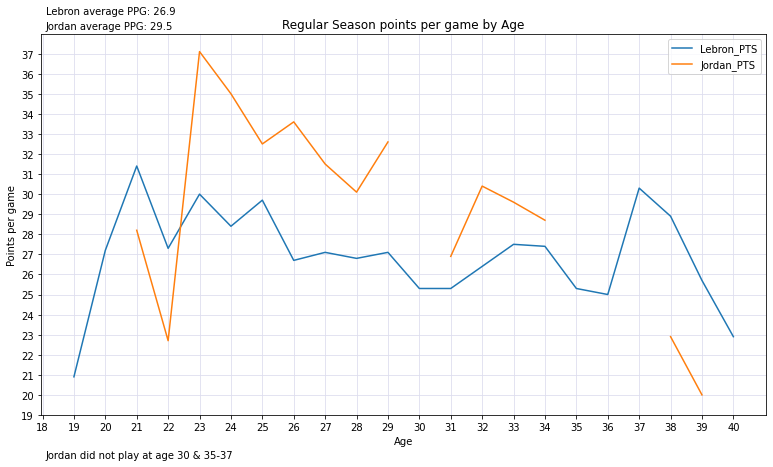

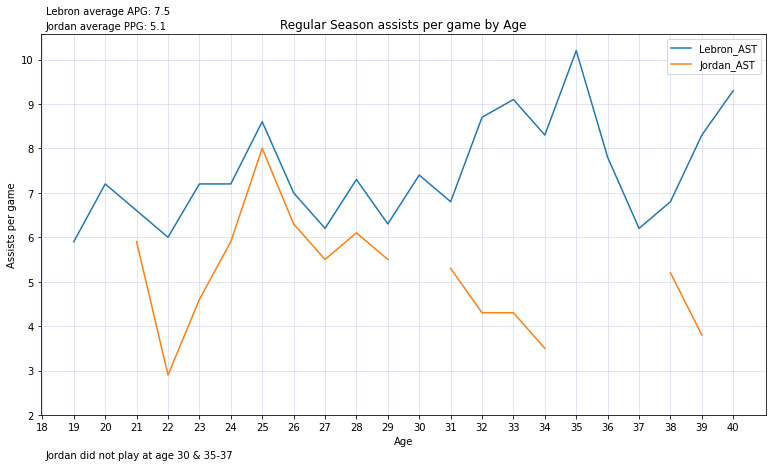

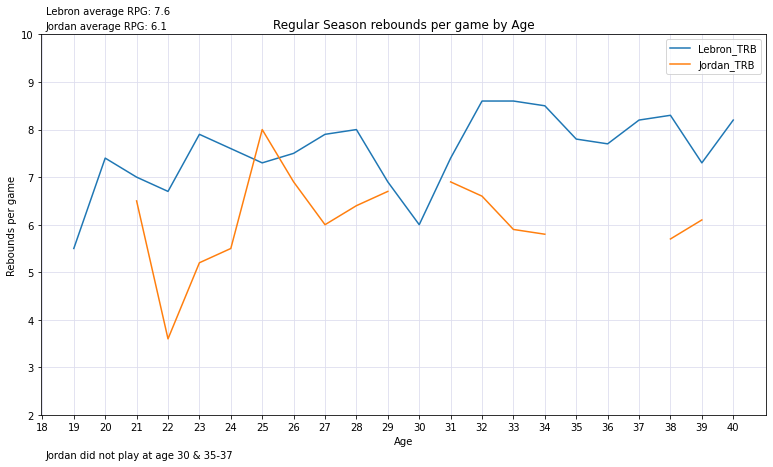

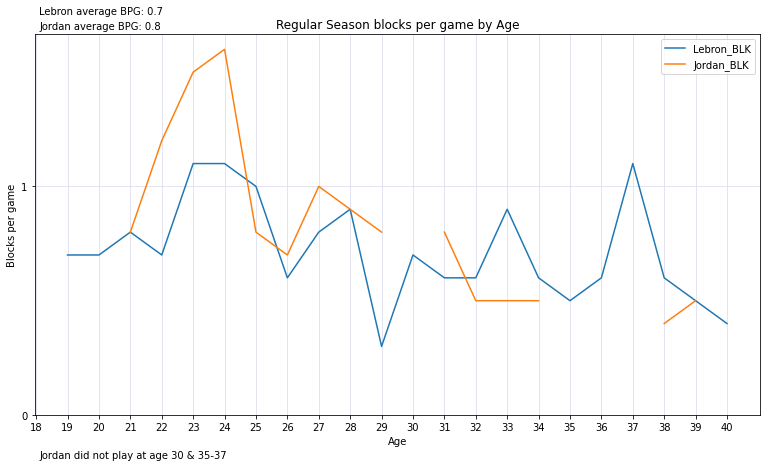

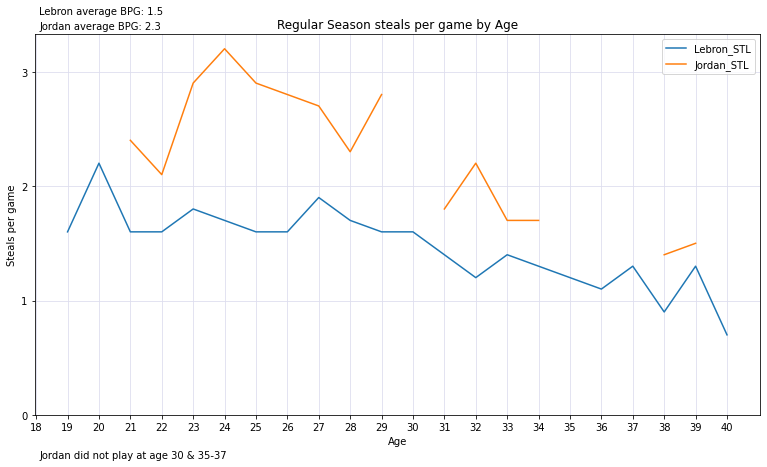

In [44]:
# Plot Points per game into line chart

keystats_both.plot(x='Age', y=['Lebron_PTS', 'Jordan_PTS'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 19
ymax = 38
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Points per game')
plt.title('Regular Season points per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average PPG: {round(keystats_both.Lebron_PTS.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average PPG: {round(keystats_both.Jordan_PTS.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot AST per game into line chart
keystats_both.plot(x='Age', y=['Lebron_AST', 'Jordan_AST'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 2
ymax = 11
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Assists per game')
plt.title('Regular Season assists per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average APG: {round(keystats_both.Lebron_AST.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average PPG: {round(keystats_both.Jordan_AST.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Rebounds per game into line chart
keystats_both.plot(x='Age', y=['Lebron_TRB', 'Jordan_TRB'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 2
ymax = 11
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Rebounds per game')
plt.title('Regular Season rebounds per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average RPG: {round(keystats_both.Lebron_TRB.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average RPG: {round(keystats_both.Jordan_TRB.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Blocks per game into line chart
keystats_both.plot(x='Age', y=['Lebron_BLK', 'Jordan_BLK'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0
ymax = 2
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Blocks per game')
plt.title('Regular Season blocks per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average BPG: {round(keystats_both.Lebron_BLK.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average BPG: {round(keystats_both.Jordan_BLK.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()

# Plot Steals per game into line chart
keystats_both.plot(x='Age', y=['Lebron_STL', 'Jordan_STL'], figsize=(13,7))
plt.xticks(np.arange(18, 41, step=1))
ymin = 0
ymax = 4
plt.yticks(np.arange(ymin, ymax, step=1))
plt.xlabel('Age')
plt.ylabel('Steals per game')
plt.title('Regular Season steals per game by Age')
plt.figtext(0.13, 0.04, "Jordan did not play at age 30 & 35-37")
plt.figtext(0.13, 0.92, f"Lebron average BPG: {round(keystats_both.Lebron_STL.mean(),1)}")
plt.figtext(0.13, 0.89, f"Jordan average BPG: {round(keystats_both.Jordan_STL.mean(),1)}")
plt.grid(color='#ddddee')
plt.show()
